In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.conv_learner import *
PATH = Path("../../Deeplearning/data/cifar10/")

In [3]:
! dir {PATH}

 Volume in drive D has no label.
 Volume Serial Number is 625A-AF7A

 Directory of D:\Work\Deeplearning\data\cifar10

04/06/2018  09:19 AM    <DIR>          .
04/06/2018  09:19 AM    <DIR>          ..
04/05/2018  04:51 PM            35,978 experiment0.png
04/05/2018  04:57 PM            50,294 experiment1.png
04/05/2018  04:50 PM            60,942 experiment2.png
04/05/2018  07:02 PM            38,327 experiment3.png
04/05/2018  07:25 PM            60,254 experiment4.png
04/04/2018  11:25 AM                60 labels.txt
04/05/2018  09:57 PM            27,226 lr_plot.png
04/04/2018  11:51 AM    <DIR>          models
04/06/2018  09:19 AM            45,830 schedule.png
04/04/2018  11:50 AM    <DIR>          test
04/04/2018  01:07 PM            35,731 test.jpg
04/04/2018  01:09 PM            27,077 test.png
04/04/2018  11:50 AM    <DIR>          tmp
04/04/2018  11:48 AM    <DIR>          train
              10 File(s)        381,719 bytes
               6 Dir(s)  667,645,018,112 bytes free

In [4]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
stats = (np.array([ 0.4914 ,  0.48216,  0.44653]), np.array([ 0.24703,  0.24349,  0.26159]))

In [5]:
def get_data(sz,bs):
    tfms = tfms_from_stats(stats, sz, aug_tfms=[RandomFlip()], pad=sz//8)
    return ImageClassifierData.from_paths(PATH, val_name='test', tfms=tfms, bs=bs)

In [6]:
size = 32
batch_size = 64

In [7]:
data = get_data(size,batch_size)

In [8]:
data_iter = iter(data.val_dl)

In [9]:
x,y=next(data_iter)

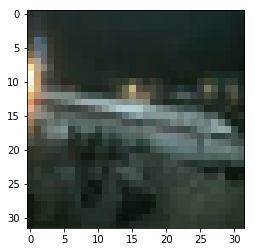

In [10]:
plt.imshow(data.trn_ds.denorm(x)[0]);

In [8]:
class SimpleNet(nn.Module):
    def __init__(self, layers):
        super().__init__()
        self.layers = nn.ModuleList([
            nn.Linear(layers[i], layers[i + 1]) for i in range(len(layers) - 1)])
        
    def forward(self, x):
        x = x.view(x.size(0), -1)
        for l in self.layers:
            l_x = l(x)
            x = F.relu(l_x)
        return F.log_softmax(l_x, dim=-1)

In [9]:
learn = ConvLearner.from_model_data(SimpleNet([32*32*3, 40,10]), data)

In [20]:
learn.opt_fn = optim.Adam

In [22]:
learn.lr_find2(num_it=50,wds=1e-4, use_wd_sched=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

In [24]:
learn.fit(0.01,1,cycle_len=2,use_clr_beta=(10,10,0.95,0.85))

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

 23%|███████████████▉                                                     | 180/782 [00:09<00:31, 18.89it/s, loss=1.97]


Exception in thread Thread-10:
Traceback (most recent call last):
  File "C:\Users\Sylvain\Anaconda3\envs\fastai\lib\threading.py", line 916, in _bootstrap_inner
    self.run()
  File "C:\Users\Sylvain\Anaconda3\envs\fastai\lib\site-packages\tqdm\_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "C:\Users\Sylvain\Anaconda3\envs\fastai\lib\_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



 27%|██████████████████▍                                                  | 209/782 [00:11<00:30, 18.93it/s, loss=1.96]


KeyboardInterrupt: 

 27%|██████████████████▍                                                  | 209/782 [00:30<01:22,  6.96it/s, loss=1.96]

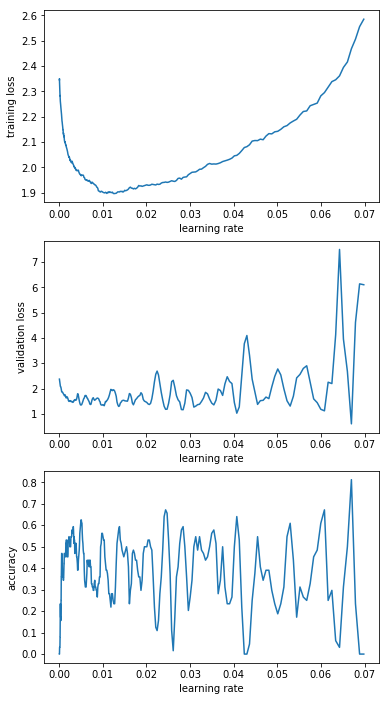

In [128]:
learn.sched.plot(n_skip_end=20)

In [116]:
iters = learn.sched.iterations

In [117]:
len(iters)

490

In [118]:
val_losses = learn.sched.val_losses
losses = learn.sched.losses
rec_metrics = learn.sched.rec_metrics

In [119]:
len(rec_metrics)

491

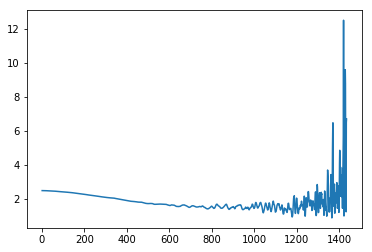

In [67]:
plt.plot(learn.sched.iterations[:-10], learn.sched.val_losses[:-11])4

In [68]:
accuracies = [learn.sched.rec_metrics[i]['accuracy'] for i in range(len(learn.sched.rec_metrics))]

In [ ]:
plt.plot(learn.sched.iterations[:-10], learn.sched.val_losses[:-11])

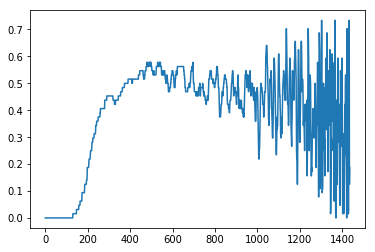

In [69]:
plt.plot(learn.sched.iterations[:-10], accuracies[:-11])

In [61]:
len(learn.sched.val_losses)

1445

In [46]:
learn.sched.rec_metrics

[{'accuracy': [0.046875]},
 {'accuracy': [0.046875]},
 {'accuracy': [0.046875]},
 {'accuracy': [0.046875]},
 {'accuracy': [0.046875]},
 {'accuracy': [0.046875]},
 {'accuracy': [0.046875]},
 {'accuracy': [0.046875]},
 {'accuracy': [0.046875]},
 {'accuracy': [0.046875]},
 {'accuracy': [0.046875]},
 {'accuracy': [0.046875]},
 {'accuracy': [0.046875]},
 {'accuracy': [0.046875]},
 {'accuracy': [0.046875]},
 {'accuracy': [0.046875]},
 {'accuracy': [0.046875]},
 {'accuracy': [0.046875]},
 {'accuracy': [0.046875]},
 {'accuracy': [0.046875]},
 {'accuracy': [0.046875]},
 {'accuracy': [0.046875]},
 {'accuracy': [0.046875]},
 {'accuracy': [0.046875]},
 {'accuracy': [0.046875]},
 {'accuracy': [0.046875]},
 {'accuracy': [0.046875]},
 {'accuracy': [0.046875]},
 {'accuracy': [0.0625]},
 {'accuracy': [0.078125]},
 {'accuracy': [0.078125]},
 {'accuracy': [0.078125]},
 {'accuracy': [0.078125]},
 {'accuracy': [0.078125]},
 {'accuracy': [0.078125]},
 {'accuracy': [0.078125]},
 {'accuracy': [0.078125]},
 {'

In [17]:
lay_opt = learn.sched.layer_opt

In [18]:
lay_opt.opt.param_groups

[{'betas': (0.9, 0.999),
  'eps': 1e-08,
  'lr': 4.109705879287773e-05,
  'params': [Parameter containing:
   -7.6291e-03  1.0435e-02 -5.4283e-04  ...   1.1248e-02 -1.8135e-03 -1.7815e-02
    2.9777e-03 -1.2929e-02  1.5696e-02  ...  -3.3291e-03  1.4445e-02 -8.9108e-03
    3.8690e-03 -3.3641e-03 -1.6537e-02  ...   5.0355e-03  1.1230e-02  9.9307e-03
                   ...                   ⋱                   ...                
    1.4148e-02  3.4371e-03 -1.5090e-02  ...   1.0123e-02 -1.1727e-02 -8.7970e-03
   -4.1093e-03 -1.5130e-02  1.4766e-02  ...   9.7148e-03 -7.0287e-03  1.7132e-02
   -1.7386e-02  1.7735e-02 -8.2158e-03  ...   1.1735e-02  1.4976e-02  9.7531e-03
   [torch.cuda.FloatTensor of size 40x3072 (GPU 0)], Parameter containing:
   1.00000e-02 *
    -0.6478
     0.5530
     0.6499
     0.3658
     1.0449
     1.0604
    -1.3180
    -1.1204
     0.4309
     1.0034
     1.6303
    -1.6536
    -0.0545
    -1.2577
    -0.5422
    -1.2785
     0.5496
    -0.6565
    -0.4163
    -0

In [21]:
learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

  1%|▌                                                                      | 3/391 [00:06<14:01,  2.17s/it, loss=2.32]

Exception in thread Thread-8:
Traceback (most recent call last):
  File "C:\Users\Sylvain\Anaconda3\envs\fastai\lib\threading.py", line 916, in _bootstrap_inner
    self.run()
  File "C:\Users\Sylvain\Anaconda3\envs\fastai\lib\site-packages\tqdm\_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "C:\Users\Sylvain\Anaconda3\envs\fastai\lib\_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



 71%|████████████████████████████████████████████████▉                    | 277/391 [02:36<01:04,  1.76it/s, loss=13.8]


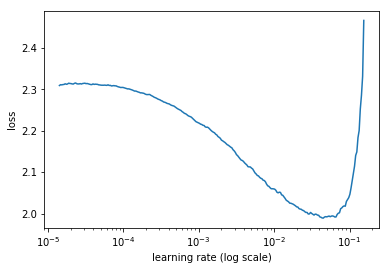

In [22]:
learn.sched.plot()

In [26]:
learn.fit(1e-2, 1, cycle_len=1, use_clr_beta=(10,10,0.95,0.85))

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.649389   1.556277   0.451642  



[1.5562772328340555, 0.4516416139240506]

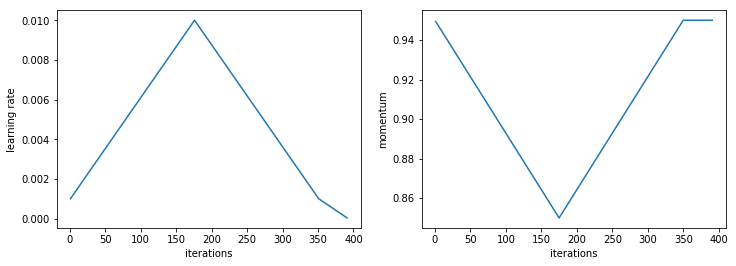

In [25]:
learn.sched.plot_lr()

In [23]:
learn.sched.layer_opt.opt.param_groups[0]['momentum']

0.9

In [24]:
use_clr = (32,8,0.85,0.95)

In [26]:
a,b = use_clr[:2]
moms = use_clr[2:]

In [27]:
moms

(0.85, 0.95)

In [47]:
learn.fit(1e-3, 1, cycle_len=4, use_clr=(10,4,0.85,0.95))

HBox(children=(IntProgress(value=0, description='Epoch', max=4), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.799052   1.690951   0.410843  
    1      1.710081   1.601665   0.433506                                                                              
    2      1.659519   1.556936   0.452476                                                                              
    3      1.652943   1.534778   0.460663                                                                              



[1.5347778, 0.4606629392971246]

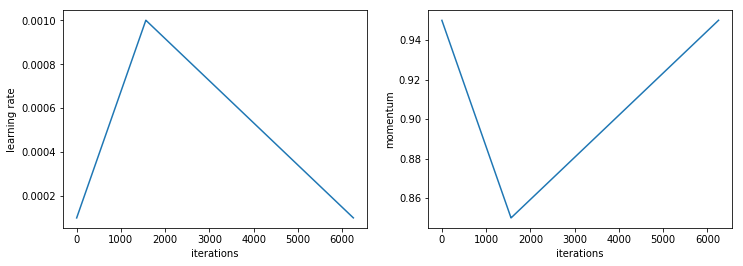

In [53]:
learn.sched.plot_lr()

In [49]:
iterations = learn.sched.iterations
lrs = learn.sched.lrs
momentums = learn.sched.momentums

# Shallow 3 layers

In [135]:
class ShallowNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,20,5,padding=2)
        self.conv2 = nn.Conv2d(20,50,5,padding=2)
        self.linear = nn.Linear(50*8*8, 500)
        self.out = nn.Linear(500,10)
    
    def forward(self,x):
        x = F.max_pool2d(F.relu(self.conv1(x)),2)
        x = F.max_pool2d(F.relu(self.conv2(x)),2)
        x = x.view(x.size(0),-1)
        x = F.relu(self.linear(x))
        return F.log_softmax(self.out(x))

In [136]:
learn = ConvLearner.from_model_data(ShallowNet(), data)
learn.crit = F.nll_loss

In [137]:
learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

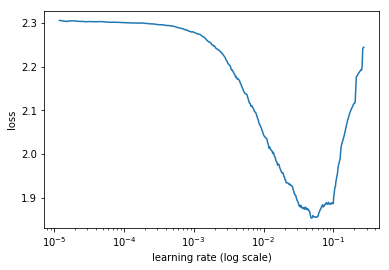

In [138]:
learn.sched.plot()

In [139]:
x,y = next(iter(data.aug_dl))

In [141]:
x[0].shape

torch.Size([3, 32, 32])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


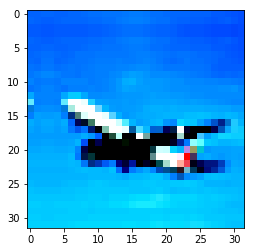

In [144]:
plt.imshow(np.transpose(x[1],(1,2,0)))

In [21]:
learn.fit(1e-2, 1, cycle_len=4, use_clr=(10,2,0.95,0.85), wds=3e-3)

HBox(children=(IntProgress(value=0, description='Epoch', max=4), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.166266   1.152554   0.596222  
    1      1.215572   1.166726   0.586432                                                                              
    2      1.1776     1.152374   0.592761                                                                              
    3      1.128169   1.08678    0.617385                                                                              


[1.086779915833775, 0.6173852848101266]

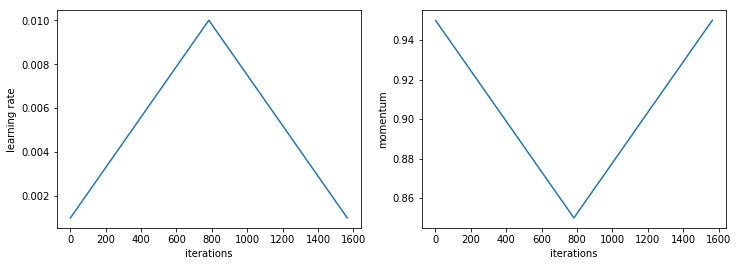

In [22]:
learn.sched.plot_lr()

In [19]:
learn.fit(1e-2, 1, cycle_len=10, use_clr1=(10,2,100,0.95,0.85), wds=3e-3)

HBox(children=(IntProgress(value=0, description='Epoch', max=10), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.184064   1.160499   0.589992  
    1      1.225595   1.173991   0.581586                                                                              
    2      1.213392   1.152305   0.594541                                                                              
    3      1.143425   1.096187   0.61788                                                                               
 37%|█████████████████████████▏                                           | 143/391 [00:07<00:12, 20.40it/s, loss=1.11]

KeyboardInterrupt: 

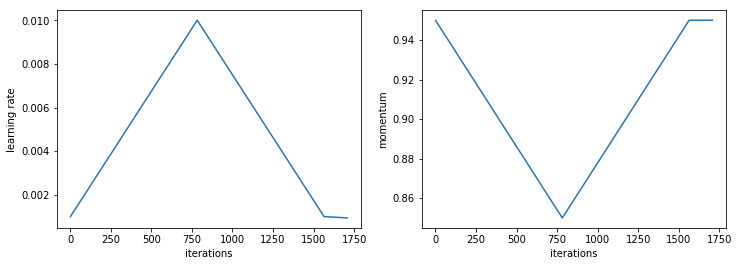

In [20]:
learn.sched.plot_lr()

# 3 conv layers

In [27]:
class ConvBN(nn.Module):
    def __init__(self, n_in, n_out, stride):
        super().__init__()
        self.conv = nn.Conv2d(n_in,n_out,3,stride=stride,padding=1)
        self.bn = nn.BatchNorm2d(n_out)
        
    def forward(self,x):
        return self.bn(self.conv(x))

In [28]:
class ShallowConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = ConvBN(3,64,2)
        self.conv2 = ConvBN(64,128,2)
        self.out = nn.Linear(128,10)
    
    def forward(self,x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = F.adaptive_avg_pool2d(x,1)
        x = x.view(x.size(0),-1)
        return F.log_softmax(self.out(x))

In [45]:
learn = ConvLearner.from_model_data(ShallowNet(), data)
learn.crit = F.nll_loss

In [46]:
learn.summary()

OrderedDict([('Linear-1',
              OrderedDict([('input_shape', [-1, 3072]),
                           ('output_shape', [-1, 1024]),
                           ('trainable', True),
                           ('nb_params', 3146752)])),
             ('Linear-2',
              OrderedDict([('input_shape', [-1, 1024]),
                           ('output_shape', [-1, 1024]),
                           ('trainable', True),
                           ('nb_params', 1049600)])),
             ('Linear-3',
              OrderedDict([('input_shape', [-1, 1024]),
                           ('output_shape', [-1, 10]),
                           ('trainable', True),
                           ('nb_params', 10250)]))])

In [47]:
learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 79%|██████████████████████████████████████████████████████▏              | 307/391 [00:09<00:02, 32.07it/s, loss=45.7]


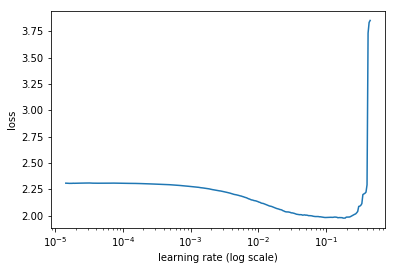

In [48]:
learn.sched.plot()

In [49]:
learn.fit(5e-2, 1, cycle_len=25, use_clr=(10,25/11,0.95,0.85))

HBox(children=(IntProgress(value=0, description='Epoch', max=25), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.660267   1.582494   0.43839   
    1      1.560502   1.490084   0.46697                                                                               
    2      1.533817   1.448728   0.483287                                                                              
    3      1.474159   1.410726   0.505142                                                                              
    4      1.475201   1.373148   0.513449                                                                              
    5      1.475229   1.368782   0.510779                                                                              
    6      1.482839   1.404723   0.50178                                                                               
 38%|██████████████████████████▍                                          | 150/391 [00:04<00:07, 30.21it/s, loss=1.

KeyboardInterrupt: 

# Resnet 56

In [147]:
size = 32
batch_size = 64
data = get_data(size,batch_size)

In [8]:
class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_planes, planes, stride=1):
        super().__init__()
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=1, padding=1, bias=False)

        if stride != 1 or in_planes != self.expansion*planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion*planes, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion*planes)
            )

    def forward(self, x):
        out = F.relu(x)
        shortcut = self.shortcut(out) if hasattr(self, 'shortcut') else x
        out = self.conv1(out)
        out = self.bn2(self.conv2(F.relu(self.bn1(out))))
        out += shortcut
        return out

In [9]:
class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=10):
        super().__init__()
        self.in_planes = 16
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(16)
        self.layer1 = self._make_layer(block, 16, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 32, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 64, num_blocks[2], stride=2)
        self.linear = nn.Linear(64*block.expansion, num_classes)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes * block.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        out = self.bn1(self.conv1(x))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = F.adaptive_max_pool2d(out, 1)
        out = out.view(out.size(0), -1)
        return F.log_softmax(self.linear(out))

In [55]:
learn = ConvLearner.from_model_data(ResNet(BasicBlock,[9,9,9]), data)
learn.crit = F.nll_loss

In [15]:
learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 78%|█████████████████████████████████████████████████████▋               | 609/782 [01:09<00:19,  8.76it/s, loss=12.4]


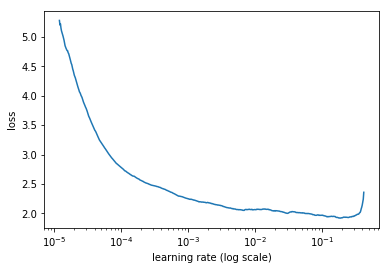

In [16]:
learn.sched.plot()

In [30]:
learn.fit(0.01, 1, cycle_len=5, use_clr_beta=(1,0))

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.775708   0.931436   0.689092  
    1      0.675417   0.696961   0.764132                                                                              
    2      0.607041   1.670062   0.779459                                                                              
    3      0.595804   0.63958    0.792994                                                                              
    4      0.522924   0.633957   0.784236                                                                              



[0.6339573553365887, 0.7842356687898089]

In [92]:
learn = ConvLearner.from_model_data(ResNet(BasicBlock,[9,9,9]), data)
learn.crit = F.nll_loss
learn.lr_find_beta(num_it=100)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 11%|███████▌                                                              | 84/782 [00:46<06:29,  1.79it/s, loss=12.3]


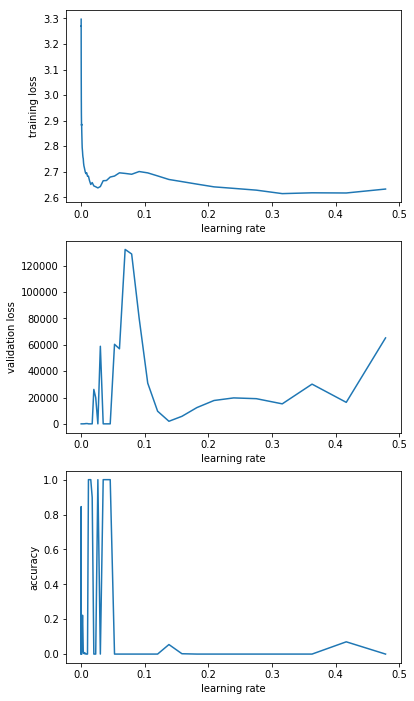

In [93]:
learn.sched.plot()

In [109]:
learn.opt_fn = optim.RMSprop

In [110]:
learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 60%|█████████████████████████████████████████▌                           | 471/782 [00:54<00:36,  8.59it/s, loss=4.12]


In [111]:
learn.sched.layer_opt.opt.param_groups[0]

{'alpha': 0.99,
 'centered': False,
 'eps': 1e-08,
 'lr': 0.041097058792876534,
 'momentum': 0,
 'params': [Parameter containing:
  (0 ,0 ,.,.) = 
    0.1154  0.1074  0.2712
    0.4642  0.0251  0.0773
    0.1532 -0.3673 -0.1657
  
  (0 ,1 ,.,.) = 
   -0.0011 -0.0573 -0.0320
    0.2008 -0.3239 -0.2769
    0.3984 -0.3123 -0.0246
  
  (0 ,2 ,.,.) = 
    0.1285 -0.2558  0.0399
    0.3137 -0.2878 -0.2394
    0.3433 -0.1290  0.0085
  
  (1 ,0 ,.,.) = 
    0.0248 -0.0418  0.3036
   -0.1312 -0.2179  0.1101
   -0.3336 -0.2348 -0.0767
  
  (1 ,1 ,.,.) = 
    0.0456  0.0795  0.2704
   -0.2156  0.0853  0.1642
   -0.2975 -0.2942  0.1496
  
  (1 ,2 ,.,.) = 
    0.1228  0.0656  0.2296
   -0.1653  0.1751  0.1145
   -0.2928 -0.2436 -0.1026
  
  (2 ,0 ,.,.) = 
    0.0509 -0.0784  0.1688
    0.0356  0.0829  0.1083
    0.1043 -0.1619 -0.1195
  
  (2 ,1 ,.,.) = 
   -0.0631 -0.1093 -0.0142
    0.1575 -0.1583 -0.0039
    0.0142  0.0071  0.1635
  
  (2 ,2 ,.,.) = 
   -0.0507  0.0182  0.0554
   -0.0608  0.0539

In [107]:
learn.opt_fn.__name__

'Adam'

In [108]:
learn.sched.layer_opt.opt.param_groups[0]['betas'][0]

0.8

In [19]:
losses[780:785]

[1.6541821079595587,
 1.6603964240761468,
 1.6607887783166204,
 1.659656904959659,
 1.658147585958895]

In [20]:
len(losses)

3910

In [21]:
3910/5

782.0

In [145]:
class PreActBlock(nn.Module):
    '''Pre-activation version of the BasicBlock.'''
    expansion = 1

    def __init__(self, in_planes, planes, stride=1):
        super(PreActBlock, self).__init__()
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=1, padding=1, bias=False)

        if stride != 1 or in_planes != self.expansion*planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion*planes, kernel_size=1, stride=stride, bias=False)
            )

    def forward(self, x):
        out = F.relu(x)
        shortcut = self.shortcut(out) if hasattr(self, 'shortcut') else x
        out = self.conv1(out)
        out = self.bn2(self.conv2(F.relu(self.bn1(out))))
        out += shortcut
        return out

In [146]:
class PreActResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=10):
        super(PreActResNet, self).__init__()
        self.in_planes = 16

        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1, bias=False)
        self.layer1 = self._make_layer(block, 16, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 32, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 64, num_blocks[2], stride=2)
        self.linear = nn.Linear(64*block.expansion, num_classes)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes * block.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        out = self.conv1(x)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = F.adaptive_max_pool2d(out, 1)
        out = out.view(out.size(0), -1)
        return F.log_softmax(self.linear(out))

In [148]:
learn = ConvLearner.from_model_data(PreActResNet(PreActBlock,[9,9,9]), data)
learn.crit = F.nll_loss

In [154]:
learn.lr_find(end_lr=100)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

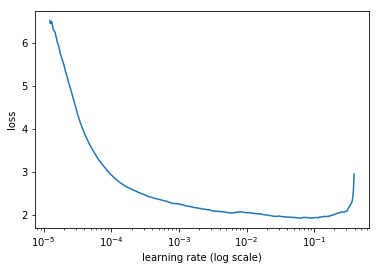

In [158]:
learn.sched.plot(10,1)

In [26]:
model = to_gpu(resnet56())
resnet56b = to_gpu(resnet56b)

In [62]:
x = V(x)
resnet56b(x)

Variable containing:
-3.0992 -4.7618 -3.4659 -3.3797 -3.8031 -2.4542 -0.7675 -4.1077 -1.6678 -2.2678
-2.7267 -4.5967 -3.1376 -2.5954 -3.6200 -2.2927 -1.1537 -3.2596 -1.4585 -2.3835
-2.9617 -4.1102 -2.8288 -2.6760 -3.2394 -2.3686 -1.2965 -3.2510 -1.4062 -2.1729
-4.1886 -5.7310 -3.6135 -4.0863 -4.4581 -3.1461 -0.4379 -4.7266 -1.7410 -2.9262
[torch.cuda.FloatTensor of size 4x10 (GPU 0)]

In [63]:
model(x)

Variable containing:
-2.6959 -1.5515 -2.4953 -3.2317 -1.3048 -2.0912 -2.4099 -2.9861 -3.2280 -3.7343
-2.4868 -1.7645 -2.4401 -3.0965 -1.4829 -2.0385 -2.0907 -2.8444 -3.1212 -3.5023
-2.1189 -1.6261 -3.0410 -2.8696 -1.5311 -1.9511 -2.1808 -2.8981 -3.5368 -3.7712
-3.4588 -2.2125 -2.0299 -4.5370 -0.6121 -3.8806 -4.6287 -4.5980 -2.3542 -3.2337
[torch.cuda.FloatTensor of size 4x10 (GPU 0)]

In [27]:
resnet56b

PreActResNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (layer1): Sequential(
    (0): PreActBlock(
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True)
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    )
    (1): PreActBlock(
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True)
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    )
    (2): PreActBlock(
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True)
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=Fal

In [28]:
model

resnet56(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (chunk1): ResnetChunk(
    (rnblocks): ModuleList(
      (0): ResnetBlock(
        (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True)
        (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True)
        (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (1): ResnetBlock(
        (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True)
        (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True)
        (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (2): ResnetBlock(
        (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True)
        (conv1): Conv2d(16, 16, kern